In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
country_data = pd.read_csv("country_data/country_data.txt", sep="\t") \
                .rename(columns={'\ufeffCountry Name': "Country Name"}) \
                .dropna(thresh=2)
        
# Drop all rows not associated with a country.
country_data = country_data.loc[1140:,:]

In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12840 entries, 1140 to 13979
Data columns (total 8 columns):
Country Name         12840 non-null object
Country Code         12840 non-null object
Series Name          12840 non-null object
Series Code          12840 non-null object
Scale (Precision)    12840 non-null object
1990 [YR1990]        8905 non-null float64
2000 [YR2000]        10243 non-null float64
2013 [YR2013]        10110 non-null float64
dtypes: float64(3), object(5)
memory usage: 902.8+ KB


In [5]:
country_data.head()

,Country Name,Country Code,Series Name,Series Code,Scale (Precision),1990 [YR1990],2000 [YR2000],2013 [YR2013]
1140,Afghanistan,AFG,"Population, total",SP.POP.TOTL,Millions (0.00),11.73,20.6,30.55
1141,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,Unit (0.0),4.50,3.0,2.40
1142,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,Thousands (0.0),652.90,652.9,652.90
1143,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,Unit (0.0),18.00,31.5,46.80
1144,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,Unit (0.0),NaN,NaN,35.80


In [6]:
indicators = country_data.pivot_table(index="Country Name", 
                                      columns="Series Name", 
                                      values="2013 [YR2013]")

In [7]:
indicators.columns

Index(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Births attended by skilled health staff (% of total)',
       'CO2 emissions (metric tons per capita)',
       'Cash surplus/deficit (% of GDP)',
       'Contraceptive prevalence (% of women ages 15-49)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'External debt stocks, total (DOD, current US$)',
       'Fertility rate, total (births per woman)',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'Forest area (sq. km)', 'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       '

In [8]:
indicators[['School enrollment, secondary (% gross)',
            'Life expectancy at birth, total (years)']].head()

Series Name,"School enrollment, secondary (% gross)","Life expectancy at birth, total (years)"
Country Name,,
Afghanistan,54,61
Albania,NaN,78
Algeria,98,71
American Samoa,NaN,NaN
Andorra,NaN,NaN


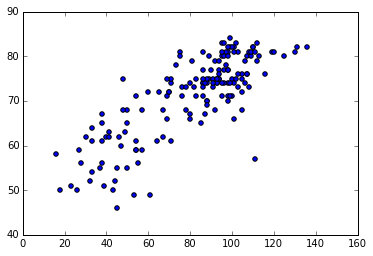

In [9]:
plt.scatter(indicators['School enrollment, secondary (% gross)'], 
            indicators['Life expectancy at birth, total (years)'])
plt.show()

In [10]:
indicators['School enrollment, secondary (% gross)'].corr(indicators['Life expectancy at birth, total (years)'])

0.80573580248216525

In [11]:
from sklearn import linear_model

In [12]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)', 
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)']]
life_expectancy = df['Life expectancy at birth, total (years)']

In [13]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, life_expectancy)
print('Coefficients: \n', regr1.coef_)
print(regr1.score(input_data, life_expectancy))

Coefficients: 
 [ 0.27856758]
0.649210183402


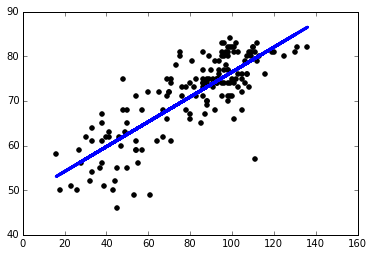

In [14]:
plt.scatter(input_data, life_expectancy,  color='black')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

In [15]:
# 80% of relevant population in secondary education
regr1.predict(80)

array([ 70.89176421])

In [16]:
df = indicators.loc[:, ['Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']

In [17]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(input_data, life_expectancy)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(input_data, life_expectancy))

Coefficients: 
 [ 0.19292499  0.13934044]
0.707279596586


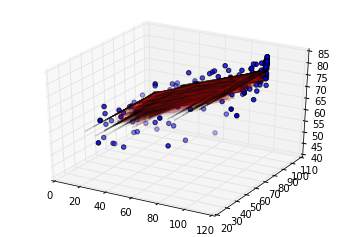

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = input_data['Improved sanitation facilities (% of population with access)']
yy = input_data['Improved water source (% of population with access)']
zz = life_expectancy
predict = regr2.predict(input_data)
x_surf, y_surf = np.meshgrid(xx, yy)
ax.plot_surface(x_surf, y_surf, predict, color="red", alpha=0.1)
ax.scatter(xx, yy, zz)

In [19]:
print(regr2.predict([80, 80]))
print(regr2.predict([85, 80]))
print(regr2.predict([80, 85]))
print(regr2.predict([82.5, 82.5]))

[ 70.67127624]
[ 71.63590118]
[ 71.36797843]
[ 71.50193981]


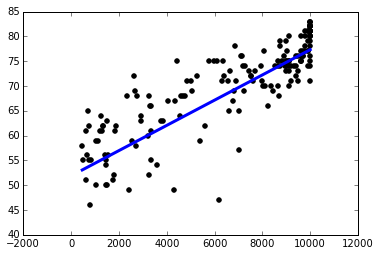

In [20]:
x1 = input_data['Improved sanitation facilities (% of population with access)']
x2 = input_data['Improved water source (% of population with access)']
yy = life_expectancy
predict = regr2.predict(input_data)
xx = x1 * x2
plt.scatter(xx, yy,  color='black')
plt.plot((min(xx), max(xx)), (min(predict), max(predict)), color='blue', linewidth=3)

In [21]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)',
                        'Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)', 
                 'Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']

In [22]:
regr3 = linear_model.LinearRegression()
fit = regr3.fit(input_data, life_expectancy)
print(regr3.score(input_data, life_expectancy))

0.757777197623


In [23]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)',
                        'Immunization, measles (% of children ages 12-23 months)',
                        'Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)', 
                 'Immunization, measles (% of children ages 12-23 months)',
                 'Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']
regr4 = linear_model.LinearRegression()
fit = regr4.fit(input_data, life_expectancy)
print(regr4.score(input_data, life_expectancy))

0.757615236053


## Automating picking the best features

In [33]:
import itertools
dependent_vars = list(indicators.columns)
dependent_vars.remove('Life expectancy at birth, total (years)')
combos = list(itertools.combinations(dependent_vars, 2))

In [40]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df = indicators.loc[:, combo + ['Life expectancy at birth, total (years)']]
    df.dropna(inplace=True)
    input_data = df[combo]
    life_expectancy = df['Life expectancy at birth, total (years)']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, life_expectancy)
    return regr, regr.score(input_data, life_expectancy)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Mortality rate, under-5 (per 1,000 live births)', 'Prevalence of HIV, total (% of population ages 15-49)'), 0.88106131742847671)
[-0.19425187 -0.56086974] 77.5600703075
